In [ ]:
# # ==========================================
# #  Import Required Libraries
# # ==========================================
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # ==========================================
# #  B-Spline Basis Function Implementation
# # ==========================================
# def b_spline_basis(x, knots, degree=3):
#     """
#     Compute the B-spline basis functions for a given input x.
#     :param x: Input values.
#     :param knots: Knot positions.
#     :param degree: Degree of the B-spline.
#     :return: B-spline basis function values.
#     """
#     n_knots = len(knots)
#     basis = np.zeros((n_knots - degree - 1, len(x)))
#     for i in range(n_knots - degree - 1):
#         basis[i, :] = b_spline_recursive(x, i, degree, knots)
#     return basis.T

# def b_spline_recursive(x, i, k, t):
#     """Recursive definition of B-spline basis function.
#       :param x: Input values.
#       :param i: Basis function index.
#       :param k: Degree of the B-spline.
#       :param t: Knot positions.
#       :return: Evaluated B-spline basis function value.
#     """
#     if k == 0:
#         return np.where((t[i] <= x) & (x < t[i + 1]), 1.0, 0.0)
#     else:
#         left = ((x - t[i]) / (t[i + k] - t[i])) * b_spline_recursive(x, i, k - 1, t)
#         right = ((t[i + k + 1] - x) / (t[i + k + 1] - t[i + 1])) * b_spline_recursive(x, i + 1, k - 1, t)
#         return np.nan_to_num(left) + np.nan_to_num(right)

# # ==========================================
# #  Edge Function Implementation
# # ==========================================
# class EdgeFunction:
#     """
#     Edge function in Kolmogorov-Arnold Networks using B-spline basis functions.
#     """
#     def __init__(self, knots, degree=3):
#         self.knots = knots  # Define knot positions
#         self.degree = degree  # Degree of B-spline
#         self.weights = np.random.randn(len(knots) - degree - 1)  # Initialize weights

#     def evaluate_basis(self, x):
#         """ Compute B-spline basis function values. """
#         return b_spline_basis(np.array([x]), self.knots, self.degree)[0]

#     def transform(self, x):
#         """ Compute the edge function transformation. """
#         basis_values = self.evaluate_basis(x)  # Compute basis function values
#         return np.dot(basis_values, self.weights)  # Weighted sum of B-spline basis functions

# # ==========================================
# #  KAN Neuron Implementation
# # ==========================================
# class KANNeuron:
#     """
#     A single neuron in a Kolmogorov-Arnold Network using edge-based activation functions.
#     """
#     def __init__(self, input_dim, knots, degree=3):
#         self.input_dim = input_dim  # Number of input features
#         self.edge_functions = [EdgeFunction(knots, degree) for _ in range(input_dim)]
#         self.bias = np.random.randn()  # Initialize bias term
#         self.activation = np.tanh  # Default activation function

#     def forward(self, x):
#         """ Compute the output of the neuron. """
#         edge_outputs = np.array([ef.transform(xi) for ef, xi in zip(self.edge_functions, x)])
#         node_input = np.sum(edge_outputs) + self.bias  # Compute sum
#         return self.activation(node_input)  # Apply activation

# # ==========================================
# #  KAN Network Implementation
# # ==========================================
# class KANLayer:
#     """
#     A fully connected layer of KAN neurons.
#     """
#     def __init__(self, input_dim, output_dim, knots, degree=3):
#         self.neurons = [KANNeuron(input_dim, knots, degree) for _ in range(output_dim)]

#     def forward(self, x):
#         """ Compute the output of the layer. """
#         return np.array([neuron.forward(x) for neuron in self.neurons])

# class KANNetwork:
#     """
#     A multi-layer Kolmogorov-Arnold Network.
#     """
#     def __init__(self, layer_dims, knots, degree=3):
#         self.layers = [KANLayer(layer_dims[i], 2*layer_dims[i]+1, knots, degree) for i in range(len(layer_dims) - 1)]

#     def forward(self, x):
#         """ Compute the output of the entire network. """
#         for layer in self.layers:
#             x = layer.forward(x)
#         return x

# # ==========================================
# #  Training Functions
# # ==========================================
# def mean_squared_error_loss(y_true, y_pred):
#     """ Compute the Mean Squared Error loss. """
#     return np.mean((y_true - y_pred) ** 2)

# def update_network_weights(network, x, grad, learning_rate=0.01):
#     """ Perform gradient descent update on all network layers. """
#     for layer in network.layers:
#         for neuron in layer.neurons:
#             edge_outputs = np.array([ef.evaluate_basis(xi) for ef, xi in zip(neuron.edge_functions, x)])
#             print(edge_outputs.shape)
#             gradient = grad @ edge_outputs  # Compute gradient of weights
#             for i, ef in enumerate(neuron.edge_functions):
#                 ef.weights -= learning_rate * gradient[i]  # Update weights

# def train_kan(network, X_train, y_train, epochs=1000, learning_rate=0.01):
#     """ Train a KAN network using gradient descent. """
#     for epoch in range(epochs):
#         total_loss = 0
#         for x, y_true in zip(X_train, y_train):
#             y_pred = network.forward(x)  # Forward pass
#             loss = mean_squared_error_loss(y_true, y_pred)
#             total_loss += loss
#             print("Y_pred:",y_true.shape,"Y_pred:",y_pred.shape,"X:",x.shape)
#             grad = -2 * (y_true - y_pred) * x
#             update_network_weights(network, x, grad, learning_rate)  # Update weights
#         print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(X_train):.4f}")

# # ==========================================#
# #  Evaluation Functions                     #
# # ==========================================#
# def evaluate_kan(network, X_test, y_test):
#     """ Evaluate KAN using MSE, MAE, and R-squared. """
#     y_pred = np.array([network.forward(x) for x in X_test])
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     print(f"Mean Squared Error: {mse}")
#     print(f"Mean Absolute Error: {mae}")
#     print(f"R-squared: {r2:.4f}")

#     return mse, mae, r2




In [ ]:
# # ==========================================
# #  Example Usage
# # ==========================================
# knots = np.linspace(-1, 1, 10)
# network = KANNetwork(layer_dims=[4, 9, 1], knots=knots, degree=3)

# # Generate Random Data
# X_train = np.random.rand(100, 4)
# y_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1])

# # Train the Network
# train_kan(network, X_train, y_train, epochs=100, learning_rate=0.01)

# # Evaluate the Model
# X_test = np.random.rand(10, 4)
# y_test = np.sin(X_test[:, 0]) + np.cos(X_test[:, 1])
# evaluate_kan(network, X_test, y_test)

In [3]:

import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, random_split, Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torchmetrics.regression import MeanAbsolutePercentageError, R2Score,MeanSquaredError,MeanAbsoluteError
np.random.seed(142)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/Users/ange-clementakazan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [132]:
Abj_dt = pd.read_csv('/Users/ange-clementakazan/Documents/Weather_Prediction_project/Deep-Learning-for-Weather-Prediction/data/Abidjan_data.csv',parse_dates={'datetime': ['YEAR', 'MO','DY']})
# Abj_dt
#Rename Columns
col_name_map = {
    "ALLSKY_SFC_SW_DWN": "ASWD",
    "CLRSKY_SFC_SW_DWN":"CSWD","ALLSKY_SFC_LW_DWN":"ALWD","PRECTOTCORR":"PREC"
}
# new_colnames=['datetime', 'ASWD', 'CSWD',
#        'ALWD', 'T2M', 'T2MDEW', 'T2MWET', 'QV2M', 'RH2M',
#        'PREC', 'PS']
# Rename the columns for both datasets
Abj_dt=Abj_dt.set_index("datetime")
Abj_dt=Abj_dt.rename(columns=col_name_map)
# Xy_train
# target_col = Abj_dt.pop("T2M")
# Abj_dt.insert(len(Abj_dt.columns),"T2M", target_col)
# Abj_dt
target_col = Abj_dt.pop("PREC")
Abj_dt.insert(len(Abj_dt.columns),"PREC", target_col)
Abj_dt

/var/folders/nv/ct8x_h9j78xbj8gnyb35c3_w0000gn/T/ipykernel_26131/2690630101.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  Abj_dt = pd.read_csv('/Users/ange-clementakazan/Downloads/KAN Codes/Abidjan_data.csv',parse_dates={'datetime': ['YEAR', 'MO','DY']})


,ASWD,CSWD,ALWD,T2M,T2MDEW,T2MWET,QV2M,RH2M,PS,PREC
datetime,,,,,,,,,,
2010-01-01,4.06,5.86,412.57,28.05,22.73,25.39,17.33,74.56,100.44,0.08
2010-01-02,5.21,5.58,408.32,28.34,22.48,25.41,17.09,72.56,100.45,0.05
2010-01-03,4.77,5.38,412.82,28.69,22.51,25.60,17.15,71.75,100.41,0.08
2010-01-04,5.17,5.55,407.15,28.44,22.46,25.45,17.15,73.00,100.43,0.05
2010-01-05,5.26,5.57,406.60,28.20,22.46,25.33,17.09,73.50,100.43,0.06
...,...,...,...,...,...,...,...,...,...,...
2023-12-28,4.47,5.38,401.95,27.37,22.82,25.09,17.46,77.75,100.65,0.15
2023-12-29,4.44,5.26,410.70,27.99,24.05,26.01,18.74,80.06,100.55,0.17
2023-12-30,5.12,5.40,409.38,27.72,24.11,25.91,18.80,81.94,100.53,0.26


In [133]:
dates=Abj_dt.index.astype(str).tolist()

In [134]:
scaler = MinMaxScaler(feature_range=(0,1))
def Make_tidydata(data,scaler):
    data= data.sort_index()
    data[data.columns] = scaler.fit_transform(data[data.columns])
    # Splitting the dataset into training, validation, and test sets
    train_size = int(len(data)*0.8)
    val_size =int(train_size*0.10)
    #Train_val_test sets
    Xy_train = data[:train_size-val_size]
    Xy_val= data[train_size-val_size:train_size]
    Xy_test=data[train_size:]
    return Xy_train,Xy_val,Xy_test
Xy_train,Xy_val,Xy_test=Make_tidydata(Abj_dt,scaler)

In [135]:
def dates_splitting(date):
    # Splitting the dataset into training, validation, and test sets
    train_size = int(len(date)*0.8)
    val_size =int(train_size*0.10)
    #Train_val_test sets
    date_train = date[:train_size-val_size]
    date_val= date[train_size-val_size:train_size]
    date_test=date[train_size:]
    return date_train,date_val,date_test

EFFICIENT_KAN (https://github.com/Blealtan/efficient-kan?tab=readme-ov-file)

In [186]:
import torch
import torch.nn.functional as F
import math


class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1) # Create n grid for n features
            .contiguous() #ensures that the tensor is stored in memory in a contiguous manner, which improves performance for operations that require sequential memory access.
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )
# We don't know out_features (Guess:2*in_features +1), the reason behind the per-batch structuration of self.spline_weight and the structuration of self.base_weight
        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps
        self.reset_parameters()
# The parameters abbove are not really known
    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                ) # Provide initial best values to the self.spline_weight (either scaled or not )
            )
            if self.enable_standalone_scale_spline:
                # torch.nn.init.constant_(self.spline_scaler, self.scale_spline)
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        """
        Compute the B-spline bases for the given input tensor.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).

        Returns:
            torch.Tensor: B-spline bases tensor of shape (batch_size, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = (
            self.grid
        )  # (in_features, grid_size + 2 * spline_order + 1)
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        """
        Compute the coefficients of the curve that interpolates the given points.
        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).
            y (torch.Tensor): Output tensor of shape (batch_size, in_features, out_features).
        Returns:
            torch.Tensor: Coefficients tensor of shape (out_features, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(
            0, 1
        )  # (in_features, batch_size, grid_size + spline_order)
        B = y.transpose(0, 1)  # (in_features, batch_size, out_features)
        # print("A shape:", A.shape)  # Should be (batch, n, m)
        # print("B shape:", B.shape)  # Should be (batch, n, out_features)

        solution = torch.linalg.lstsq(
            A, B
        ).solution  # (in_features, grid_size + spline_order, out_features)
        result = solution.permute(
            2, 0, 1
        )  # (out_features, in_features, grid_size + spline_order)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )
    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.reshape(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.reshape(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)  # (batch, in, coeff)
        splines = splines.permute(1, 0, 2)  # (in, batch, coeff)
        orig_coeff = self.scaled_spline_weight  # (out, in, coeff)
        orig_coeff = orig_coeff.permute(1, 2, 0)  # (in, coeff, out)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)  # (in, batch, out)
        unreduced_spline_output = unreduced_spline_output.permute(
            1, 0, 2
        )  # (batch, in, out)

        # sort each channel individually to collect data distribution
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        """
        Compute the regularization loss.

        This is a dumb simulation of the original L1 regularization as stated in the
        paper, since the original one requires computing absolutes and entropy from the
        expanded (batch, in_features, out_features) intermediate tensor, which is hidden
        behind the F.linear function if we want an memory efficient implementation.

        The L1 regularization is now computed as mean absolute value of the spline
        weights. The authors implementation also includes this term in addition to the
        sample-based regularization.
        """
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )


class KAN(torch.nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = torch.nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor, update_grid=False):
        for layer in self.layers:
            if update_grid:
                layer.update_grid(x)
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

In [174]:
# Define the data 
X_train,y_train=Xy_train.values[:,:-1],Xy_train.values[:,-1]
X_train = torch.tensor(X_train, dtype=torch.float32)  # Convert to float32
y_train = torch.tensor(y_train, dtype=torch.float32)  # Convert to float32


In [187]:
# Define the KAN NN
layers_hidden=[9, 19,1]
Kan_network=KAN(layers_hidden=layers_hidden).to(torch.float32) 
print(Kan_network)

KAN(
  (layers): ModuleList(
    (0-1): 2 x KANLinear(
      (base_activation): SiLU()
    )
  )
)


In [176]:
## KAN neural network
# Kan_nn=Kan_network(X_train)

In [188]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# # Generate toy regression data
# X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# # Normalize features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = y.reshape(-1, 1)  # Make y a column vector

# # Convert to PyTorch tensors
# X_train = torch.tensor(X, dtype=torch.float32)
# y_train = torch.tensor(y, dtype=torch.float32)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train, y_train.reshape(-1, 1))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [178]:
# kan_model = KAN(
#     layers_hidden=[2, 5, 1]  # Example architecture
# ).to(torch.float32)  # Ensure correct dtype

# optimizer = torch.optim.Adam(kan_model.parameters(), lr=0.01)

# for name, param in kan_model.named_parameters():
#     print(name, param.shape)  # Check if parameters exist

In [189]:
# Define loss and optimizer
criterion = nn.MSELoss()  # Regression loss
optimizer = torch.optim.Adam(Kan_network.parameters(), lr=0.01)

In [190]:
# Training loop
epochs = 100
for epoch in range(epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Reset gradients
        y_pred = Kan_network(X_batch, update_grid=True)  # Forward pass
        loss = criterion(y_pred, y_batch)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()
    
    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f"Epoch [{epoch}/{epochs}], Loss: {epoch_loss / len(train_loader)}") #:.4f

print("Training complete! 🚀")

Epoch [0/100], Loss: 0.003878115052618247
Epoch [10/100], Loss: 0.0033282629166055343
Epoch [20/100], Loss: 0.0031568206167290115
Epoch [30/100], Loss: 0.0030051462868116155
Epoch [40/100], Loss: 0.0030743141241114714
Epoch [50/100], Loss: 0.003034417183290974
Epoch [60/100], Loss: 0.002986821187921029
Epoch [70/100], Loss: 0.002961840733970066
Epoch [80/100], Loss: 0.002967898023441727
Epoch [90/100], Loss: 0.0029675413167971217
Training complete! 🚀


In [191]:
# Define the data 
X_test,y_test=Xy_test.values[:,:-1],Xy_test.values[:,-1]
X_test = torch.tensor(X_test, dtype=torch.float32)  # Convert to float32
y_test = torch.tensor(y_test, dtype=torch.float32)  # Convert to float32
test_dataset = TensorDataset(X_test, y_test.reshape(-1, 1))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [192]:
from torchmetrics.regression import MeanAbsolutePercentageError, R2Score,MeanSquaredError,MeanAbsoluteError
MAPE= MeanAbsolutePercentageError()
## Metrics
#Define metrics
def rmse(predictions, targets):
    return torch.sqrt(torch.mean((predictions - targets) ** 2)).item()

def mse(predictions, targets):
    return torch.mean((predictions - targets) ** 2).item()

def mae(predictions, targets):
    return torch.mean(torch.abs(predictions - targets)).item()

def r2_score( y_pred,y_true):
    """Computes the R-squared (R²) metric.
    Args:
        y_true (torch.Tensor): True target values.
        y_pred (torch.Tensor): Predicted values.
    Returns:
        torch.Tensor: R² score.
    """
    # Compute the mean of true values
    y_mean = torch.mean(y_true)
    # Compute residual sum of squares (SS_res)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    # Compute total sum of squares (SS_tot)
    ss_tot = torch.sum((y_true - y_mean) ** 2)
    # Compute R²
    r2 = 1 - (ss_res / ss_tot)
    return r2

def evaluate_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    y_true_list = []
    y_pred_list = []
    with torch.no_grad():
        cpt=0
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device) # The size of the y_batch matters a lot, be careful abou that!!
            outputs = model(X_batch, update_grid=True)
            # print(outputs.shape,y_batch.shape)
            loss = mse(outputs, y_batch)
            total_loss += loss * X_batch.size(0)
            y_true_list.append(y_batch.cpu().numpy())
            y_pred_list.append(outputs.cpu().numpy())
            # cpt+=1
        
        # print(cpt)
        avg_loss = total_loss / len(test_loader.dataset)   
        y_true = np.concatenate(y_true_list)
        y_pred = np.concatenate(y_pred_list)    
        rmse_ = rmse(torch.tensor(y_pred), torch.tensor(y_true))
        mae_ = mae(torch.tensor(y_pred), torch.tensor(y_true))
        r2 = r2_score(torch.tensor(y_pred), torch.tensor(y_true))
        mape = MAPE(torch.tensor(y_pred), torch.tensor(y_true))
        
        print(f'Test Loss (MSE): {avg_loss}') #:.4f
        print(f'RMSE: {rmse_}')
        print(f'MAE: {mae_}')
        print(f'R²: {r2:.4f}')
        print(f'MAPE: {mape:.4f}%')
        return [mape.numpy(),r2,mae_,rmse_,avg_loss]

In [170]:
# len(test_loader.dataset)
date_train,date_val,date_test=dates_splitting(dates)


In [193]:
# date_test[:10]
KAN_metrics_prec= evaluate_model(Kan_network, test_loader)

Test Loss (MSE): 0.007474483387728648
RMSE: 0.0864550992846489
MAE: 0.05511311814188957
R²: 0.2379
MAPE: 209.3069%


In [117]:
KAN_metrics= evaluate_model(Kan_network, test_loader)

Test Loss (MSE): 8.106330671637408e-05
RMSE: 0.009003516286611557
MAE: 0.007717379368841648
R²: 0.9954
MAPE: 0.0229%


In [120]:
import torch
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_predicted_vs_actual(model, test_loader,scaler, device, dates, model_name="KAN",variable_name="T2M"):
    """
    Plots Predicted vs Actual values for a time series model with date labels.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        test_loader (torch.utils.data.DataLoader): DataLoader for test data.
        device (torch.device): Device (CPU/GPU) to run the model on.
        dates (list or np.array): List of datetime objects corresponding to the test data.
        title (str): Title of the plot.
    """
    model.eval()  # Set model to evaluation mode
    actuals = []
    predictions = []
    ## Creating data
    input=[]
    with torch.no_grad():  # No gradients needed during inference
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            input.append(X_batch.cpu().numpy())
            # Get model predictions
            y_pred = model(X_batch)
            
            # Flatten tensors and move to CPU for plotting
            actuals.extend(y_batch.squeeze().cpu().numpy())  # True values
            predictions.extend(y_pred.squeeze().cpu().numpy())  # Predicted values
    ##  
    input_test=np.concatenate(input,axis=0)
    ##
    original_data=np.concatenate([input_test,np.array(actuals).reshape(-1,1)],axis=1)
    predicted_data=np.concatenate([input_test,np.array(predictions).reshape(-1,1)],axis=1)
    ##
    actuals_data = scaler.inverse_transform(original_data)
    predictions_data = scaler.inverse_transform(predicted_data)
    # Ensure dates align with predictions
    if len(dates) != len(actuals):
        raise ValueError("The length of the 'dates' array must match the number of test samples.")
    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(dates, actuals_data[:,-1], label="Actual", linestyle="-", color="blue")
    plt.plot(dates, predictions_data[:,-1], label=f"{model_name} Prediction", linestyle="--", color="red")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title(f" {model_name} Prediction vs {variable_name} Actual Time Series")
    plt.xticks(rotation=45)  # Rotate dates for better visibility
    plt.legend()
    plt.grid(True)
    # plt.show()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show every 2nd date
    plt.gcf().autofmt_xdate()  # Auto-adjust date formatting
    
    # plt.grid()
    plt.show()


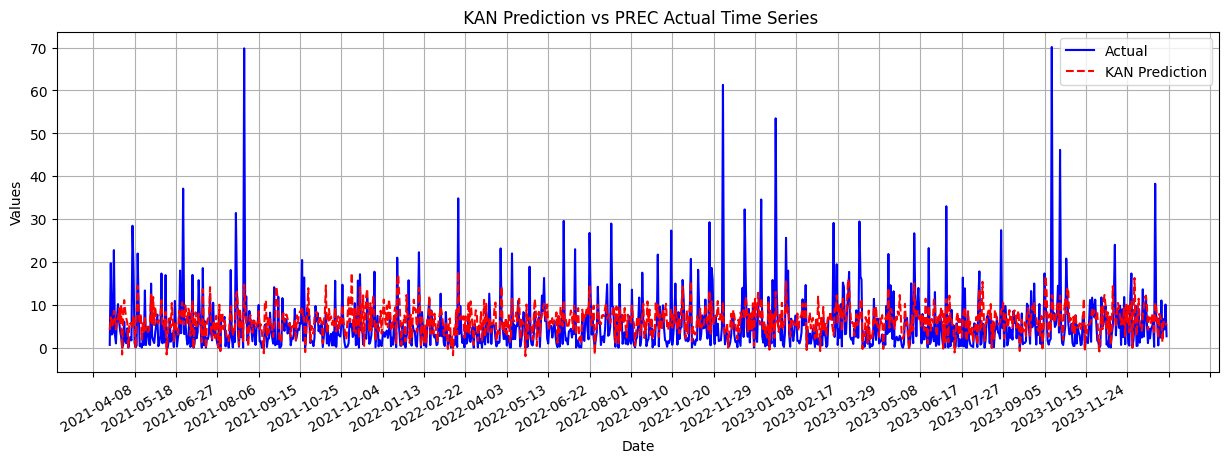

In [194]:
plot_predicted_vs_actual(Kan_network, test_loader,scaler, device, date_test,variable_name="PREC")

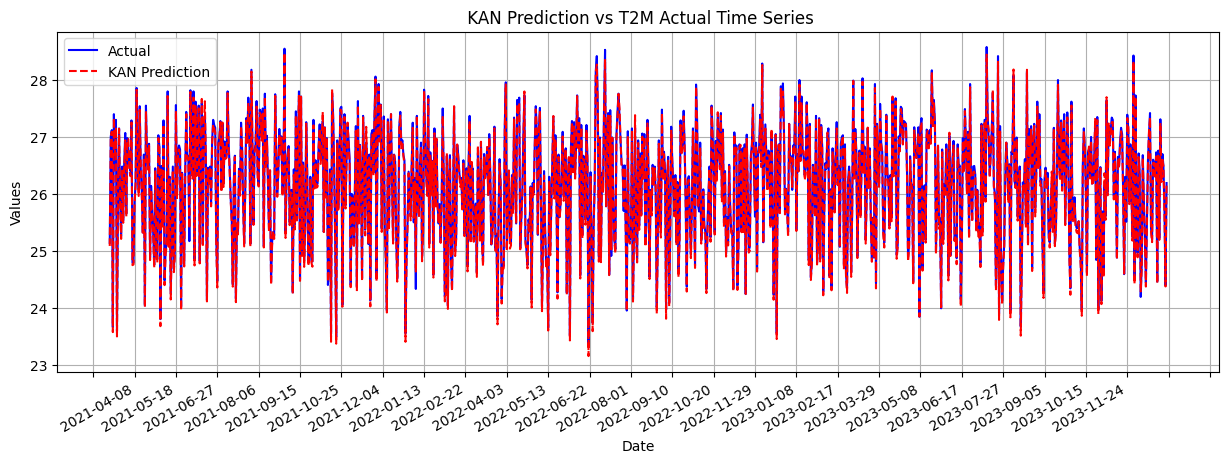

In [121]:
plot_predicted_vs_actual(Kan_network, test_loader,scaler, device, date_test)

In [55]:
# epoch_loss=0.0
# # criterion=nn.MSELoss()
# for X_batch, y_batch in test_loader:
#         Kan_network.eval()
#         y_pred = Kan_network(X_batch, update_grid=True)  # Forward pass
#         loss = mse(y_pred, y_batch)  # Compute loss
#         epoch_loss += loss*X_batch.size(0)
# print(f" Test MSE Loss: {epoch_loss / len(test_loader.dataset)}") #:.4f

In [ ]:
# Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

# RuntimeError: false INTERNAL ASSERT FAILED at "/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp":1540, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.


### **Understanding the Grid in KAN – The Simplest Explanation**

Think of the **grid** as a **set of fixed points** that help us divide the input space into small sections. These sections act as "reference points" for the B-splines, which help the network smoothly transform inputs.

---

## **Step 1: Why Do We Need a Grid?**
In a **normal neural network**, we just multiply the input by weights and pass it through an activation function.

🛑 **Problem:**  
- Regular networks can struggle to learn **complex functions** smoothly.
- If we only use simple multiplications, the function can be **too rigid**.

💡 **Solution:**  
- Instead of applying a fixed transformation, **KAN splits the input space into small intervals** (defined by a **grid**) and applies different transformations in each part.

The grid **helps define these intervals**.

---

## **Step 2: How is the Grid Created?**
### 📍 **Breaking Down the Code**
```python
h = (grid_range[1] - grid_range[0]) / grid_size
grid = (
    (
        torch.arange(-spline_order, grid_size + spline_order + 1) * h
        + grid_range[0]
    )
    .expand(in_features, -1)
    .contiguous()
)
self.register_buffer("grid", grid)
```

✅ **What does this do?**
1. **Finds the step size (`h`)**  
   - This determines how far apart the grid points should be.
   - Formula:  
     $$
h = \frac{\text{grid\_range}[1] - \text{grid\_range}[0]}{\text{grid\_size}}
$$

- **Example:** If `grid_range = [-1,1]` and `grid_size = 5`, then:
  $$
h = \frac{1 - (-1)}{5} = \frac{2}{5} = 0.4
$$



   
2. **Generates the grid points (`grid`)**  
   - We create **a sequence of points** that **divide the input space**.
   - If `grid_size = 5`, the grid might look like:
     ```
     [-1.0, -0.6, -0.2, 0.2, 0.6, 1.0]
     ```
   - We add **extra points** for smoothness (`spline_order`), which extends the grid slightly beyond the range.

3. **Registers the grid (`self.register_buffer("grid", grid)`)**  
   - This makes sure PyTorch stores the grid **without treating it as a learnable parameter**.

---

## **Step 3: How Does the Grid Work?**
1. **Think of the grid as a ruler.** 📏  
   - It divides the input space into small sections.
   - Each section defines where different splines will be applied.

2. **When an input comes in, we check which grid section it falls into.**  
   - Example: If input `x = -0.3`, it falls **between -0.6 and -0.2**.

3. **Each section has its own small "curve" (B-spline) that transforms the input smoothly.**  
   - Instead of applying the same function everywhere, we apply **different curves in different sections**.

---

## **Step 4: What Happens When Inputs Change?**
1. **The input data may not be evenly spread out.**  
   - Some values may appear **more often** than others.

2. **We update the grid to match the actual data distribution.**  
   - This helps the model learn **more efficiently**.
   - Code:
     ```python
     def update_grid(self, x: torch.Tensor, margin=0.01):
     ```
   - The grid **adapts** to where the data is **most concentrated**.

3. **Result:**  
   - Instead of using a **fixed** set of grid points, the network **adjusts them dynamically**.
   - This makes KAN much **better at capturing important patterns**.

---

## **Final Analogy**
Think of a **KAN grid like dividing a road into different lanes**:
- A **normal neural network** treats the entire road **as one big lane**.
- **KAN** divides the road into **small lanes** and **adjusts the curves** in each lane separately.

🚗 **If a car (input) moves from lane to lane, the road curves differently in each lane!** 🚗

This **adaptive lane system** (the grid) helps KAN learn complex patterns **much better than traditional networks**.

---

### **TL;DR – Grid in Simple Terms**
✅ **What is the grid?**  
- A **set of reference points** that help divide the input space.  
- It tells the network **where to apply different transformations**.  

✅ **Why is it useful?**  
- Helps the network learn **smooth and complex functions more efficiently**.  
- Adapts dynamically to the data to improve learning.  

✅ **How does it work?**  
- Splits input space into small sections.  
- Uses **B-splines** to apply different transformations in each section.  
- Adjusts itself as new data comes in.  

Would you like a **visual explanation** or an even simpler analogy? 🚀

Alright! Let's break down this **Kolmogorov-Arnold Network (KAN)** code step by step in a very simple and clear way.

---

### **1. What is this code?**
This code defines a **Kolmogorov-Arnold Network (KAN)** using PyTorch.

🧠 **What is a KAN?**  
KAN is a neural network that **learns functions more efficiently** by using **B-splines** (a special type of mathematical curve). Instead of just multiplying inputs with weights like regular neural networks, KAN applies **splines** to learn smoother and more flexible transformations.

This code builds a **custom PyTorch module** that:
- Implements **KAN layers** (`KANLinear`).
- Uses **B-splines** to represent non-linear transformations.
- Builds a full **KAN model** (`KAN`).

---

## **2. Breaking Down the Code**
Now, let’s go step by step.

### **Step 1: Import Libraries**
```python
import torch
import torch.nn.functional as F
import math
```
📌 This imports **PyTorch** (for neural network operations) and **math** (for some calculations).

---

### **Step 2: Creating a Custom KAN Layer (`KANLinear`)**
The main **building block** of the KAN model is `KANLinear`. This layer:
- Works like a standard **fully connected (linear) layer** but includes **B-splines**.
- Learns two types of weights:
  1. **Base weights** → Normal weights used in standard networks.
  2. **Spline weights** → Additional weights for smooth transformations using splines.

#### **📍 Defining the Layer**
```python
class KANLinear(torch.nn.Module):
```
📌 This defines a new layer called **`KANLinear`**, which is a subclass of `torch.nn.Module` (the base class for all PyTorch models).

#### **📍 Initializing (`__init__`)**
```python
def __init__(
    self,
    in_features, out_features,
    grid_size=5, spline_order=3,
    scale_noise=0.1, scale_base=1.0,
    scale_spline=1.0, enable_standalone_scale_spline=True,
    base_activation=torch.nn.SiLU,
    grid_eps=0.02, grid_range=[-1, 1],
):
```
📌 This function **initializes** the layer with several parameters.

✅ **Important parameters:**
- `in_features` and `out_features` → Number of input and output neurons.
- `grid_size` → Number of grid points for the spline (default: **5**).
- `spline_order` → Order of the spline (default: **3**, cubic splines).
- `scale_noise` → Controls noise added to the weights.
- `scale_base` → Scaling factor for base weights.
- `scale_spline` → Scaling factor for spline weights.
- `base_activation` → The activation function (**SiLU** by default).
- `grid_eps` → Controls updates to the spline grid.
- `grid_range` → Defines the range for grid points (default: `[-1,1]`).

---

#### **📍 Setting up the Grid**
```python
h = (grid_range[1] - grid_range[0]) / grid_size
grid = (
    (
        torch.arange(-spline_order, grid_size + spline_order + 1) * h
        + grid_range[0]
    )
    .expand(in_features, -1)
    .contiguous()
)
self.register_buffer("grid", grid)
```
📌 **What’s happening?**
- The code **creates a grid** where the **B-splines** will be defined.
- This grid **divides the input range** into small sections.
- `self.register_buffer("grid", grid)` → Stores the grid as a **fixed tensor** (not trainable).

---

#### **📍 Defining the Trainable Parameters**
```python
self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
self.spline_weight = torch.nn.Parameter(
    torch.Tensor(out_features, in_features, grid_size + spline_order)
)
```
📌 These are the **learnable parameters** of the layer:
- `base_weight` → The normal weights (like in standard neural networks).
- `spline_weight` → The additional weights used for the **B-spline transformation**.

---

#### **📍 Resetting Parameters**
```python
def reset_parameters(self):
    torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
```
📌 This initializes the **base weights** using **Kaiming initialization** (which helps with deep learning training).

---

### **Step 3: Computing the B-spline Basis Functions**
```python
def b_splines(self, x: torch.Tensor):
```
📌 This function computes the **B-spline basis functions** for an input `x`.

✅ **What does it do?**
- It checks which grid points `x` belongs to.
- It **builds the B-spline basis** using recursion.
- It outputs a tensor that **weights the influence** of each spline.

---

### **Step 4: Finding Spline Coefficients**
```python
def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
```
📌 This function **fits** the best **spline coefficients** to the data.

✅ **What does it do?**
- It **solves a least squares problem** to find spline coefficients that best fit `y` for given inputs `x`.
- Uses **torch.linalg.lstsq()** to find the best fit.

---

### **Step 5: Forward Pass**
```python
def forward(self, x: torch.Tensor):
```
📌 This is the **core function** that applies the transformation when you pass an input through the layer.

✅ **What does it do?**
1. **Applies activation to the input.**
2. **Computes the base transformation** using a normal linear layer:
   ```python
   base_output = F.linear(self.base_activation(x), self.base_weight)
   ```
3. **Computes the spline transformation**:
   ```python
   spline_output = F.linear(
       self.b_splines(x).view(x.size(0), -1),
       self.scaled_spline_weight.view(self.out_features, -1),
   )
   ```
4. **Adds both results together** to get the final output.

---

### **Step 6: Updating the Grid**
```python
def update_grid(self, x: torch.Tensor, margin=0.01):
```
📌 This function **adapts the grid** based on input data.

✅ **What does it do?**
- Sorts `x` to understand the data distribution.
- Updates the grid points **based on the actual input data**.
- Recomputes the spline coefficients.

---

### **Step 7: Regularization Loss**
```python
def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
```
📌 Adds **regularization** to prevent overfitting.

✅ **What does it do?**
- Computes an **L1 penalty** to encourage **sparse** spline weights.
- Computes an **entropy loss** to improve weight distribution.

---

## **3. Creating the Full KAN Model**
```python
class KAN(torch.nn.Module):
```
📌 This **combines multiple `KANLinear` layers** into a full neural network.

✅ **How does it work?**
- It takes a list of `layers_hidden` (e.g., `[10, 20, 30]`).
- Creates **multiple KAN layers**:
  ```python
  for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
      self.layers.append(KANLinear(in_features, out_features, ...))
  ```
- Runs a **forward pass** through all the layers.

---

## **Final Thoughts**
✅ This **KAN model** works like a **fully connected network**, but:
- It **learns non-linear functions more efficiently** using **B-splines**.
- It **automatically adjusts** to input data using an **adaptive grid**.
- It **reduces the need for deep architectures** by better function approximation.

💡 **Key takeaways:**
- `KANLinear` is a **custom layer** that uses **splines**.
- The **forward pass** combines a **base transformation** and a **spline transformation**.
- The **grid updates** help improve learning over time.

---

This explanation simplifies each part. Let me know if you need further clarifications! 🚀

## **Understanding B-Splines in KAN (Kolmogorov-Arnold Networks)**

### **1. What are B-Splines?**
A **B-spline (Basis Spline)** is a **piecewise polynomial function** that provides a **smooth approximation** of data. Instead of using a single polynomial to fit a function, B-splines **combine multiple polynomials** over different segments of an input range.

✅ **Key properties:**
- They are **local**, meaning that changes in one part of the input **do not affect** the entire function.
- They are **smooth**, meaning that they can approximate non-linear functions efficiently.
- They are **defined over a grid of points**, called **knots**.

B-splines are widely used in **curve fitting, interpolation, and neural networks** to create flexible function approximations.

---

### **2. How B-Splines Work in KAN**
In **KAN**, B-splines are used to **transform the input features** before passing them through a neural network layer. Instead of applying a traditional activation function like ReLU, we express the transformation as a **sum of weighted B-spline basis functions**.

---

### **3. Mathematically Defining B-Splines**
## **Mathematically Defining B-Splines with Detailed Demonstration & Examples**

To fully understand how **B-splines work**, let's go step by step and illustrate with **examples and visual intuition**. This will make it clearer how **KAN uses B-splines for function approximation**.

---

## **1. Understanding B-Splines: The Big Idea**
### **📌 What problem do B-Splines solve?**
Imagine you want to approximate a function **\( f(x) \)**. You could:
1. Use a **polynomial** (but it might oscillate too much).
2. Use a **piecewise function** (but it may be discontinuous).
3. Use **B-splines**, which are smooth and localized.

✅ **B-splines create smooth approximations by blending small polynomial functions together in different segments of the input range.**  

Think of it like this:  
- Instead of **one big curve**, we build **small, simple curves** that join together smoothly.
- Each part of the function is influenced by a few points instead of all the data.

---

## **2. Definition of B-Splines (Step-by-Step)**
A **B-spline of order \( k \)** is a **piecewise polynomial of degree \( k-1 \)**, defined recursively.

### **📍 Step 1: Define the Grid (Knots)**
We first define **a set of knots** (grid points) where the splines are evaluated:

$$
t_0, t_1, t_2, \dots, t_n
$$

These **knots** divide the input space into sections.

✅ **Example:**
Let's say we have a grid with knots at:

$$
t_0 = 0, \quad t_1 = 1, \quad t_2 = 2, \quad t_3 = 3, \quad t_4 = 4
$$

We will now build B-splines based on these points.

---

### **📍 Step 2: Base Case (Order-0 B-Splines)**
The **simplest** B-spline is a step function:

$$
B_{i,0}(x) =
\begin{cases}
1, & \text{if } t_i \leq x < t_{i+1} \\
0, & \text{otherwise}
\end{cases}
$$

✅ **Example:**
For knots \( 0, 1, 2, 3, 4 \), the order-0 B-splines look like:

$$
B_{0,0}(x) =
\begin{cases}
1, & \text{if } 0 \leq x < 1 \\
0, & \text{otherwise}
\end{cases}
$$

$$
B_{1,0}(x) =
\begin{cases}
1, & \text{if } 1 \leq x < 2 \\
0, & \text{otherwise}
\end{cases}
$$

$$
B_{2,0}(x) =
\begin{cases}
1, & \text{if } 2 \leq x < 3 \\
0, & \text{otherwise}
\end{cases}
$$

📌 **Graphically**, this would look like a set of **non-overlapping rectangles**:

```
x-axis:   0    1    2    3    4
          |----|----|----|----|
 B0,0(x): | 1  | 0  | 0  | 0  |
 B1,0(x): | 0  | 1  | 0  | 0  |
 B2,0(x): | 0  | 0  | 1  | 0  |
 B3,0(x): | 0  | 0  | 0  | 1  |
```

These are just **piecewise constant functions**.

---

### **📍 Step 3: Recursive Definition (Higher-Order B-Splines)**
To create **smoother** curves, we **blend lower-order splines** using the formula:

$$
B_{i,k}(x) = \frac{x - t_i}{t_{i+k} - t_i} B_{i,k-1}(x) + \frac{t_{i+k+1} - x}{t_{i+k+1} - t_{i+1}} B_{i+1,k-1}(x)
$$

📌 **Key idea:**  
Each **higher-order spline is built from two lower-order splines**.

---

### **📍 Step 4: Example of First-Order B-Splines (\( k = 1 \))**
For **\( k = 1 \)**, the B-splines are **linear**.

$$
B_{i,1}(x) = \frac{x - t_i}{t_{i+1} - t_i} B_{i,0}(x) + \frac{t_{i+2} - x}{t_{i+2} - t_{i+1}} B_{i+1,0}(x)
$$

✅ **Example:**
Let's compute **\( B_{0,1}(x) \)** for **knots \( 0, 1, 2 \)**:

$$
B_{0,1}(x) = \frac{x - 0}{1 - 0} B_{0,0}(x) + \frac{2 - x}{2 - 1} B_{1,0}(x)
$$

Expanding:

$$
B_{0,1}(x) =
\begin{cases}
(x - 0) & \text{if } 0 \leq x < 1 \\
(2 - x) & \text{if } 1 \leq x < 2 \\
0 & \text{otherwise}
\end{cases}
$$

📌 **Graphically**, this looks like a **triangular shape**:

```
x-axis:   0    1    2
          |----|----|
 B0,1(x):  0   /|   0
             /  |
            /   |
           /    |
```

- It **rises** from 0 to 1 between \( 0 \) and \( 1 \).
- It **falls** from 1 to 0 between \( 1 \) and \( 2 \).

✅ **Key point:**  
Each B-spline **affects only a small region** instead of the entire input.

---

### **📍 Step 5: Example of Second-Order B-Splines (\( k = 2 \))**
For **\( k = 2 \)**, we blend **two first-order B-splines**:

$$
B_{i,2}(x) = \frac{x - t_i}{t_{i+2} - t_i} B_{i,1}(x) + \frac{t_{i+3} - x}{t_{i+3} - t_{i+1}} B_{i+1,1}(x)
$$

✅ **Example:**
Using knots \( 0, 1, 2, 3 \):

$$
B_{0,2}(x) = \frac{x - 0}{2 - 0} B_{0,1}(x) + \frac{3 - x}{3 - 1} B_{1,1}(x)
$$

Expanding:

$$
B_{0,2}(x) =
\begin{cases}
\frac{x}{2} (x - 0) & \text{if } 0 \leq x < 1 \\
\frac{(3-x)}{2} (x - 1) & \text{if } 1 \leq x < 2 \\
0 & \text{otherwise}
\end{cases}
$$

📌 **Graphically**, this looks like a **smoother curve**, forming a **parabola**.

✅ **Key Takeaways:**
- **Higher-order splines create smoother functions**.
- The **support of each B-spline is limited to a few knots**, making it computationally efficient.

---

## **3. How KAN Uses B-Splines**
Now that we understand how B-splines work, let's summarize **how they are used in KAN**:

1. **Define a grid** of knots (`grid_size` and `spline_order` in the code).
2. **Compute B-spline basis functions** (`b_splines()` function).
3. **Multiply input features by the B-spline basis** (`forward()` function).
4. **Learn weights for B-spline combinations** instead of using traditional activations.

✅ **Why is this better?**
- It allows the network to **learn more flexible, smooth functions**.
- It provides **better generalization with fewer layers**.
- It allows **dynamic adaptation** of grid points (`update_grid()` function).

---

## **Conclusion**
- **B-Splines are smooth, local, and efficient.**
- **They are built recursively, starting from step functions.**
- **KAN uses B-Splines to learn better approximations of functions.**

🚀 **Now, you have a strong intuition about B-splines!** Let me know if you need more clarifications! 🔥

---

### **4. How B-Splines are Implemented in KAN**
Now let’s analyze the **`b_splines()`** function in the code.

#### **Step 1: Getting the Input and Grid**
```python
grid: torch.Tensor = self.grid
x = x.unsqueeze(-1)
```
✅ This **expands** the input `x` to match the dimensions of the grid.

#### **Step 2: Initializing Order-0 B-Splines**
```python
bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
```
✅ This **creates the 0th-order B-spline basis**:
- If `x` is between two adjacent grid points, set the basis value to `1`.
- Otherwise, set it to `0`.

#### **Step 3: Computing Higher-Order B-Splines**
```python
for k in range(1, self.spline_order + 1):
    bases = (
        (x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]
    ) + (
        (grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:]
    )
```
✅ This implements the recursive formula:

$$
B_{i,k}(x) = \frac{x - t_i}{t_{i+k} - t_i} B_{i,k-1}(x) + \frac{t_{i+k+1} - x}{t_{i+k+1} - t_{i+1}} B_{i+1,k-1}(x)
$$

📌 **What’s happening here?**
1. The function **iteratively builds higher-order B-splines** from the base case.
2. It **blends adjacent lower-order splines** to create smoother functions.

✅ **Final Output:** A tensor containing **B-spline values** for the given `x`, which will be used to transform the input features.

---

## **5. The Role of the Grid in KAN**
The **grid** defines where the B-splines are located. It is created in the `KANLinear` class:

```python
h = (grid_range[1] - grid_range[0]) / grid_size
grid = (
    (
        torch.arange(-spline_order, grid_size + spline_order + 1) * h
        + grid_range[0]
    )
    .expand(in_features, -1)
    .contiguous()
)
self.register_buffer("grid", grid)
```

### **📍 Understanding the Grid**
✅ The grid is a set of **knots** where the B-splines are defined.

1. `grid_size` defines how many segments the input range is split into.
2. `spline_order` defines how **smooth and complex** the transformation is.
3. The **spacing (`h`)** is determined by:

$$
h = \frac{\text{grid_range}[1] - \text{grid_range}[0]}{\text{grid_size}}
\$$

✅ **What does this do?**
- It **creates evenly spaced knots** across the range `[-1,1]`.
- The **extra knots on the sides** (`spline_order` number of them) are added to handle **edge cases** smoothly.

---

## **6. The Role of B-Splines and the Grid in KAN**
Now that we understand **B-splines** and **the grid**, let's explain their role in KAN.

### **📌 How does this work?**
1. **The input features `x` are passed through the B-spline basis functions.**
2. **Each input feature is converted into a weighted sum of B-splines.**
3. **The neural network learns weights for these B-spline basis functions instead of learning direct connections like in traditional networks.**
4. **The final transformed features are passed through a linear layer.**

### **✅ Why is this useful?**
- **B-splines allow a smooth, piecewise function representation.**
- **Instead of learning one large polynomial function, KAN learns multiple small, well-behaved polynomial pieces.**
- **This leads to better function approximation with fewer layers.**
- **Grid updates allow the model to dynamically adjust to the data.**

---

## **7. Algorithm for KAN Using B-Splines**
Here’s a **simplified algorithm** for how KAN processes an input using B-splines:

1. **Define the Grid:**
   - Set `grid_size` and `spline_order`.
   - Compute grid points.
   
2. **Compute B-Spline Basis Functions:**
   - Initialize order-0 basis functions.
   - Compute higher-order B-splines recursively.

3. **Transform Input Features:**
   - Convert input `x` into B-spline basis values.
   - Multiply with learned spline weights.

4. **Apply Base Transformation:**
   - Compute a normal linear transformation with base weights.

5. **Combine Outputs:**
   - Add base transformation and B-spline transformation.

6. **Update Grid (Optional):**
   - If enabled, adjust grid points based on input distribution.

---

## **8. Conclusion**
✅ **B-splines in KAN help approximate functions more efficiently** by using smooth, piecewise polynomials.  
✅ The **grid defines where B-splines are placed**, controlling how flexible the function approximation is.  
✅ Instead of **learning a single function**, KAN **learns a combination of local B-spline transformations**.

### **💡 Key Takeaways**
- **B-Splines replace traditional activations** to provide more flexibility.
- The **grid defines where splines are applied** and is dynamically updated.
- This approach allows **better function approximation with fewer layers**.

🚀 **KAN is a powerful alternative to traditional neural networks!** Let me know if anything needs further clarification! 🎯

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
